In [1]:
from qiskit import *
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from matplotlib import pyplot

Section - Setup Circuit Parameters

In [2]:
backend = AerSimulator()

qubits = 6 # The number of physical qubits
a = 42 # the hidden integer

# Ensure it can be represented with the number of specified qubits
a = a % 2**(qubits)

Section - Quantum Register and Classical Register Initialization

In [3]:
qr = QuantumRegister(qubits)
cr = ClassicalRegister(qubits)

circ = QuantumCircuit(qr, cr)

Section - Superposition State Preparation (Equal weights to all basis states)

In [4]:
for i in range(qubits):
    circ.h(qr[i])  # Apply Hadamard gates to put qubits in supe

circ.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=6, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(6, 'q1'), 0), Qubit(QuantumRegister(6, 'q1'), 1), Qubit(QuantumRegister(6, 'q1'), 2), Qubit(QuantumRegister(6, 'q1'), 3), Qubit(QuantumRegister(6, 'q1'), 4), Qubit(QuantumRegister(6, 'q1'), 5)), clbits=())

Section - Oracle Function

In [5]:
for i in range(qubits):
    # Apply Z gate if the i-th bit of 'a' is 1
    if (a & (1 << i)):
        circ.z(qr[i]) 
    # Apply identity gate if the i-th bit of 'a' is 0
    else:
        circ.id(qr[i])
        circ.barrier()

for i in range(qubits):
    circ.h(qr[i])

Section - Running the circuit

In [6]:
circ.barrier()
circ.measure(qr,cr)
circ.draw("mpl")


qc_compiled = transpile(circ, backend)
job_sim = backend.run(qc_compiled, shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(qc_compiled)

Section - Plotting the results

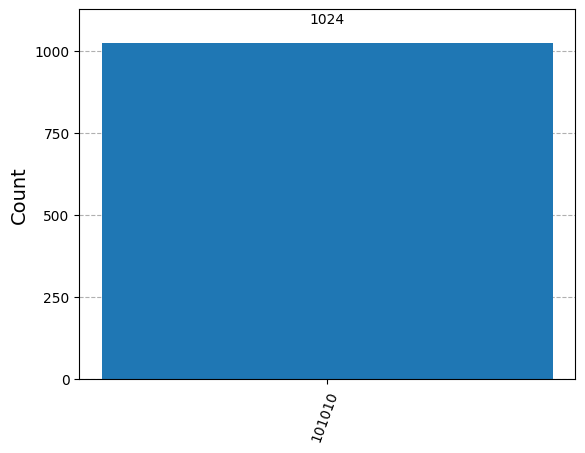

In [7]:
plot_histogram(counts)